# Module 58.1: Interest Rate Risk and Return
<hr>

In [34]:
# Import libraries
import math
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from pandas.core.common import random_state
# from sklearn.linear_model import LinearRegression

### LOS 58.a: Calculate and interpret the sources of return from investing in a fixed-rate bond.

There are **three sources of returns** from investing in a fixed-rate bond:

1. Coupon and principal payments

2. Interest earned on coupon payments that are reinvested over the investor's holding period for the bond

3. Any capital gain or loss if the bond is sold before maturity


We will assume that a bond makes all of its promised coupon and principal payments on time (i.e., we are not addressing credit risk). Additionally, we assume that the *interest rate earned on reinvested coupon payments is the same as the prevailing yield to maturity (YTM*) on the bond.

Given the assumptions just listed, we may draw five key results:

1. An investor who holds a fixed-rate bond to maturity will earn an annualized rate of return equal to the YTM of the bond when purchased, if the YTM of the bond (and hence the reinvestment rate) does not change over the life of the bond.

2. An investor who sells a bond before maturity will earn a rate of return equal to the YTM at purchase if the YTM has not changed since purchase.

3. If the market YTM for the bond, our assumed reinvestment rate, increases (decreases) after the bond is purchased but before the first coupon date, an investor who holds the bond to maturity will earn a realized return that is higher (lower) than the original YTM of the bond when purchased.

4. If the market YTM for the bond, our assumed reinvestment rate, increases after the bond is purchased but before the first coupon date, a bond investor will earn a rate of return that is lower than the YTM at bond purchase if the bond is held for a *short* period.

5. If the market YTM for the bond, our assumed reinvestment rate, decreases after the bond is purchased but before the first coupon date, a bond investor will earn a rate of return that is lower than the YTM at bond purchase if the bond is held for a *long* period.

We will present mathematical examples to demonstrate each of these results as well as some intuition as to why these results must hold.

We call the time that the bond will be held the investor's **investment horizon**, which may be shorter than the bond's maturity. A bond investor's **horizon yield** is the compound annual return earned from the bond over the investment horizon. It is calculated by comparing the purchase price of the bond to the end value derived from holding the bond, which includes coupons, interest earned on reinvested coupons, and the sale price (or principal payment amount, if the bond is held to maturity).


#### Unchanged YTM, Bond Held to Maturity

We will illustrate this calculation (and the first result listed earlier) with a 6% annual-pay 3-year bond purchased at a YTM of 7% and held to maturity.

With an annual YTM of 7%, the bond's purchase price is 97.376:

`N = 3; I/Y = 7; PMT = 6; FV = 100; CPT → PV = –97.376`

At maturity, the investor will have received coupon income and reinvestment income equal to the future value of an annuity of three $6 coupon payments calculated with an interest rate equal to the bond's YTM. This is the amount:

$$
6(1.07)^2 + 6(1.07) + 6 = \$19.289
$$

`N = 3; I/Y = 7; PV = 0; PMT = 6; CPT → FV = –19.289`

We can easily calculate the amount earned from reinvestment of the coupons as follows:

        19.289 – 3(6) = 1.289

Adding the principal payment at maturity of \\$100 to \\$19.289, we can calculate the investor's rate of return over the 3-year holding period as $ \large\Biggr(\frac{\$119.289}{\$97.376}\Biggr)^{1/3} - 1 = 7\%$ and demonstrate that \$97.376 invested at a compound annual rate of 7\% would return \\$119.289 after three years. 

With this example, we have demonstrated our first result: for a fixed-rate bond that does not default and has a reinvestment rate equal to the YTM, an investor who holds the bond until maturity will earn a rate of return equal to the YTM at purchase.

#### Unchanged YTM, Bond Sold Before Maturity

Now let's examine the second result—that an investor who sells a bond before maturity will earn a rate of return equal to the YTM *as long as the YTM has not changed since purchase*. If the YTM of the bond remains unchanged, the value of a bond will move toward the par value of the bond by the maturity date. At dates between the purchase and the maturity, the value of a bond at the same YTM as when it was purchased is its **carrying value**, and it reflects the amortization of the discount or premium since the bond was purchased.

>**Professor's Note**\
    *Carrying value* is a price along a bond's constant-yield price trajectory (in other words, it is the value of the bond at a certain time after purchase, assuming the original yield of the bond has not changed). It is referred to as carrying value because it is the value that is often shown on the balance sheet in financial reporting when a bond is held to maturity. This is not the same as the market value of the bond if its yield has changed.

Capital gains or losses at the time a bond is sold are measured relative to this carrying value, as illustrated in the following example.

**Example: Capital gain or loss on a bond**

An investor purchases a 20-year bond with a 5% semiannual coupon and a yield to maturity of 6\%. Five years later, the investor sells the bond for a price of $91.40. Determine whether the investor realizes a capital gain or loss, and calculate its amount.

In [35]:
# Use NumpyFinancial to solve PV 1
PV = round(npf.pv(rate = .03, nper = 30, pmt=2.5, fv=100),3)
cap_gain = round(91.40 - (PV * -1),3)


print("PV of a 20-year bond w/ 5% semiannual coupon & YTM of 6% = $",PV*-1)
print("B/c Selling price = 91.40, investor realizes cap gain of = $",cap_gain*-1)

PV of a 20-year bond w/ 5% semiannual coupon & YTM of 6% = $ 90.2
B/c Selling price = 91.40, investor realizes cap gain of = $ -1.2


**Answer:**

Any capital gain or loss is based on the bond's carrying value at the time of sale, when it has 15 years (30 semiannual periods) to maturity. The carrying value is calculated using the bond's YTM at the time the investor purchased it:

`N = 30; I/Y = 3; PMT = 2.5; FV = 100; CPT → PV = –90.20`

Because the selling price of 91.40 is *greater than* the <u>carrying value</u> of 90.20, the investor realizes a capital gain of 91.40 – 90.20 = 1.20 per 100 of face value.

Bonds held to maturity have no capital gain or loss. Bonds sold before maturity at the same YTM as at purchase will also have no capital gain or loss. Using the 6\%  3-year bond from our earlier examples, we can demonstrate this for an investor with a two-year holding period (investment horizon).

After the bond is purchased at a YTM of 7\% (for 97.376), we have the following.

Price at sale (at end of Year 2, YTM = 7\%):

$\Large\frac{106}{1.07}\small =  \$99.065$

`N = 1; I/Y = 7; FV = 100; PMT = 6; CPT → PV = –99.065`

which is the carrying value of the bond.

Coupon interest and reinvestment income for two years:

$6(1.07) + 6 = \$12.420$

`N = 2; I/Y = 7; PV = 0; PMT = 6; CPT → FV = –12.420`

Investor's annual compound rate of return over the two-year holding period:
$$
\large\Biggr(\frac{12.420 + 99.065}{97.376}\Biggr)^{1/2}– 1 = 7\%
$$

This demonstrates the second key result we listed: that for a bond investor with a horizon less than the bond's term to maturity, the annual return will be equal to the YTM at purchase if the bond is sold at that YTM and all coupons are reinvested at the original YTM.



#### Changed YTM, Bond Held to Maturity

Next let's examine our third result—that if rates rise (fall) before the first coupon date, an investor who holds a bond to maturity will earn a rate of return greater (less) than the YTM at purchase.

Based on our previous result that an investor who holds a bond to maturity will earn a rate of return equal to the YTM at purchase if the reinvestment rate is also equal to the YTM at purchase, the intuition of the third result is straightforward. If the YTM, which is also the reinvestment rate for the bond, increases (decreases) after purchase, the return from coupon payments and reinvestment income will increase (decrease) as a result, which will increase (decrease) the investor's rate of return on the bond above (below) its YTM at purchase. The following calculations demonstrate these results for the 3-year 6% bond in our previous examples.

For a 3-year 6% bond purchased at 97.376 (YTM of 7%), first assume that the YTM and reinvestment rate increases to 8% after purchase but before the first coupon payment date. The bond's annualized holding period return is calculated as follows.

##### Coupons and reinvestment interest:

$6(1.08)^2 + 6(1.08) + 6 = \$19.478$

`N = 3; I/Y = 8; PV = 0; PMT = 6; CPT → FV = –19.478`

Investor's annual compound holding period return:

$$
\large\Biggr(\frac{119.478}{97.376}\Biggr)^{1/3}  – 1 = 7.06\%
$$

which is greater than the 7\% YTM at purchase.

If the YTM decreases to 6\% after purchase but before the first coupon date, we have the following.

Coupons and reinvestment interest:

$6(1.06)^2 + 6(1.06) + 6 = \$19.102$

`N = 3; I/Y = 6; PV = 0; PMT = 6; CPT → FV = –19.102`

Investor's annual compound holding period return:

$$
\large\Biggr(\frac{119.102}{97.376}\Biggr)^{1/3}  – 1 = 6.94\%
$$
\

which is less than the 7\% YTM at purchase.

Note that in both cases, the investor's rate of return is between the YTM at purchase and the assumed reinvestment rate (the new YTM).

##### Changed YTM, Bond Sold Before Maturity

We now turn our attention to the fourth and fifth results concerning the effects of the length of an investor's holding period on the rate of return for a bond that experiences an increase or decrease in its YTM before the first coupon date.

Consider a 3-year 6\% bond purchased at 97.376 by an investor with a one-year investment horizon. If the YTM increases from 7\% to 8\% after purchase and the bond is sold after one year, the rate of return can be calculated as follows.

Bond price just after first coupon has been paid with YTM = 8\%:

`N = 2; I/Y = 8; FV = 100; PMT = 6; CPT → PV = –96.433`

There is no reinvestment income and only one coupon of \$6 received, so the holding period rate of return is simply:


$$
\large\Biggr(\frac{6 + 96.4332}{97.376}\Biggr) – 1 = 5.19\%
$$
\
which is less than the YTM at purchase.

If the YTM decreases to 6\% after purchase and the bond is sold at the end of one year, the investor's rate of return can be calculated as follows.

Bond price just after first coupon has been paid with YTM = 6\%:

`N = 2; I/Y = 6; FV = 100; PMT = 6; CPT → PV = –100.00`

And the holding period rate of return is simply:

\
$$
\large\Biggr(\frac{6 + 100.00}{97.376}\Biggr) – 1 = 8.86\%
$$

\
which is greater than the YTM at purchase.

The intuition of this result is based on the idea of a tradeoff between **price risk** (the uncertainty about a bond's price due to uncertainty about the prevailing market YTM at a time of sale) and **reinvestment risk** (uncertainty about the total of coupon payments and reinvestment income on those payments due to the uncertainty about future reinvestment rates).

Previously, we showed that for a bond held to maturity, the investor's rate of return increased with an increase in the bond's YTM and decreased with a decrease in the bond's YTM. For an investor who intends to hold a bond to maturity, there is no price risk as we have defined it (because they do not intend to sell the bond). Assuming no default, the bond's value at maturity is its par value regardless of interest rate changes, so that the investor has only reinvestment risk. Her realized return will increase when interest earned on reinvested cash flows increases, and decrease when the reinvestment rate decreases.

For an investor with a short investment horizon, because they intend to sell the bond before maturity, price risk increases and reinvestment risk decreases. For the investor with a one-year investment horizon, there was no reinvestment risk because the bond was sold before any interest on coupon payments was earned. The investor had only price risk, so an increase in yield decreased the rate of return over the one-year holding period because the sale price was lower. Conversely, a decrease in yield increased the one-year holding period return to more than the YTM at purchase because the sale price was higher.

To summarize:

* Short investment horizon: price risk > reinvestment risk
* Long investment horizon: reinvestment risk > price risk

### LOS 58.b: Describe the relationships among a bond's holding period return, its Macaulay duration, and the investment horizon.

### LOS 58.c: Define, calculate, and interpret Macaulay duration.

Is there an investment horizon where price risk and reinvestment risk are in balance? There is, as demonstrated by the following example.

**Example: Investment horizon yields**

Consider a 5-year, 11\% annual coupon bond priced at 86.59 to yield 15\% to maturity. Calculate the horizon yield for an investment horizon of 4 years, assuming that the YTM does the following:

* **(a)** Falls to 14\% before the first coupon date
* **(b)** Rises to 16\% before the first coupon date

**Answer:**

**(A) Falls to 14% before the first coupon date**
*Sale after 4 years*

Bond price:

`N = 1; PMT = 11; FV = 100; I/Y = 14; CPT → PV = 97.368`

Coupons and interest on reinvested coupons:

`N = 4; PMT = 11; PV = 0; I/Y = 14; CPT → FV = 54.133`

Horizon return:

$\Biggr[\large\frac{(97.368 + 54.133)}{86.59}\Biggr]^{1/4} \small – 1 = 15.0\%$

**(B) Rises to 16% before the first coupon date**
*Sale after 4 years*

Bond price:

`N = 1; PMT = 11; FV = 100; I/Y = 16; CPT → PV = 95.690`

Coupons and interest on reinvested coupons:

`N = 4; PMT = 11; PV = 0; I/Y = 16; CPT → FV = 55.731`

Horizon return:

$\Biggr[\large\frac{(95.690 + 55.731)}{86.59}\Biggr]^{1/4} \small – 1 = 15.0\%$

For an investment horizon of 4 years, the horizon return is equal to the original YTM of 15%, regardless of changes in the YTM of the bond.



This example shows that for a particular fixed-coupon bond, we can find an investment horizon that is neither short enough to face price risk nor long enough to face reinvestment risk. For this bond it was an investment horizon of four years. At this horizon, if the YTM decreases, losses on reinvestment income are just balanced by a gain in price. If the YTM increases, gains in reinvestment income are just offset by a loss in price.

How can we easily find this "sweet spot" investment horizon? We can determine the average time until the receipt of the cash flows of the bond, referred to as its **Macaulay duration**.

A bond's (annual) Macaulay duration is calculated as the weighted average of the number of years until each of the bond's promised cash flows is to be paid, where the weights are the present values of each cash flow as a percentage of the bond's full value.

Consider the bond in the example. The present values of each of the bond's promised payments, discounted at the bond's YTM of 15%, and their weights in the calculation of Macaulay duration, are shown in the following table.

<table style="undefined;table-layout: fixed; width: 467px">
<colgroup>
<col style="width: 59px">
<col style="width: 121px">
<col style="width: 66px">
<col style="width: 168px">
<col style="width: 53px">
</colgroup>
<tbody>
  <tr>
    <td>C1 = 11</td>
    <td>PV1 = 11 / 1.15^1</td>
    <td> = 9.565</td>
    <td>W1 = 9.565 / 86.59</td>
    <td>0.1105</td>
  </tr>
  <tr>
    <td>C2 = 11</td>
    <td>PV2 = 11 / 1.15^2</td>
    <td> = 8.318</td>
    <td>W2 = 8.318 / 86.59</td>
    <td>0.0961</td>
  </tr>
  <tr>
    <td>C3 = 11</td>
    <td>PV3 = 11 / 1.15^3</td>
    <td>= 7.233</td>
    <td>W3 = 7.233 / 86.59</td>
    <td>0.0835</td>
  </tr>
  <tr>
    <td>C4 = 11</td>
    <td>PV4 = 11 / 1.15^4</td>
    <td>= 6.289</td>
    <td>W4 = 6.289 / 86.59</td>
    <td>0.0726</td>
  </tr>
  <tr>
    <td>C5 = 11</td>
    <td>PV5 = 11 / 1.15^5</td>
    <td>= <u>55.187</u></td>
    <td>W5 = 55.187 / 86.59</td>
    <td><u>0.6373</u></td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>86.59</td>
    <td></td>
    <td>1.0000</td>
  </tr>
</tbody>
</table>


The present values of all the promised cash flows sum to 86.59 (the full price of the bond) and the weights sum to 1.

Now that we have the weights, and because we know the time until each promised payment is to be made, we can calculate the Macaulay duration for this bond:

`0.1105(1) + 0.0961(2) + 0.0835(3) + 0.0726(4) + 0.6373(5) = 4.03 years`

Our interpretation of this Macaulay duration is that, as demonstrated in the example, if we have an investment horizon of four years, then we still earn the original YTM of the bond out to this horizon—even if the YTM of the bond immediately changes after purchasing the bond.

The Macaulay duration of a semiannual-pay bond can be calculated in the same way: as a weighted average of the number of semiannual periods until the cash flows are to be received. In this case, the result is the number of semiannual periods rather than years (to express this in annualized terms, divide the number of semiannual periods by two).

The difference between a bond's Macaulay duration and the bondholder's investment horizon is referred to as a duration gap. A positive **duration gap** (Macaulay duration greater than the investment horizon) exposes the investor to price risk from increasing interest rates. A negative duration gap (Macaulay duration less than the investment horizon) exposes the investor to reinvestment risk from decreasing interest rates.

## Calculating duration

We will use a simplifed formula for duration \
\
$\text{Duration} = \Large\frac{P_{down} - P_{up}}{2 \times P × \Delta y}$

Where:

$P$ = Bond price at 1% lower yield \
$P$ = Bond price at 1% higher yield \
$P$ = Bond price at current yield \
$\Delta y$ = Change in yield (we will use 1%)


In [62]:
# 10 year bond, 5% annual coupon, 4% yield to maturity, what is it's duration?
price = -npf.pv(rate=0.05, nper=10, pmt=5, fv=100)
priceup = -npf.pv(rate=0.06, nper=10, pmt=5, fv=100)
pricedown = -npf.pv(rate=0.04, nper=10, pmt=5, fv=100)
duration = (pricedown - priceup) / (2 * price * 0.01)
print("Printing the duration of a 4% YTM  = ",round(duration,2))
print("A 1% move in interest rates causes a  7.74% change in bond price")

Printing the duration of a 4% YTM  =  7.74
A 1% move in interest rates causes a  7.74% change in bond price


In [63]:
bond_maturity = np.arange(0, 30, 0.1)
bond = pd.DataFrame(bond_maturity, columns=['bond_maturity'])
bond['price'] = -npf.pv(rate=0.05, nper=bond['bond_maturity'],pmt=5,fv=100)
bond['price_up'] = -npf.pv(rate=0.05 + 0.01, nper=bond['bond_maturity'],pmt=5, fv=100)
bond['price_down'] = -npf.pv(rate=0.05 - 0.01, nper=bond['bond_maturity'],pmt=5, fv=100)
bond['duration'] = (bond['price_down'] - bond['price_up']) / (2 * bond['price'] * 0.01)

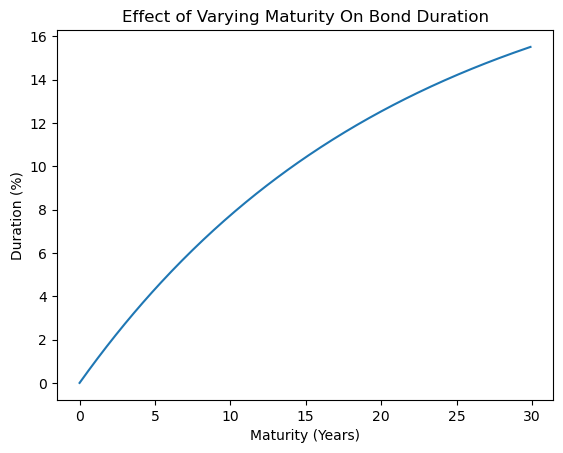

In [64]:
# Plot the Maturity against duration
plt.plot(bond['bond_maturity'], bond['duration'])
plt.xlabel('Maturity (Years)')
plt.ylabel('Duration (%)')
plt.title("Effect of Varying Maturity On Bond Duration")
plt.show()

## Reading 58: Key Concepts
<hr>

### LOS 58.a

Sources of return from a bond investment include the following:

* Coupon and principal payments
* Reinvestment of coupon payments
* Capital gain or loss if bond is sold before maturity


Changes in yield to maturity (YTM) produce price risk (uncertainty about a bond's price) and reinvestment risk (uncertainty about income from reinvesting coupon payments). An increase (a decrease) in YTM decreases (increases) a bond's price but increases (decreases) its reinvestment income.

### LOS 58.b

Over a short investment horizon, a change in YTM affects price more than it affects reinvestment income.

Over a long investment horizon, a change in YTM affects reinvestment income more than it affects price.

The Macaulay duration may be interpreted as the investment horizon for which a bond's price risk and reinvestment risk offset each other:

`duration gap = Macaulay duration − investment horizon`

### LOS 58.c

Macaulay duration is calculated as the weighted average of the number of years until each of the bond's promised cash flows is to be paid, where the weights are the present values of each cash flow as a percentage of the bond's full value.

<hr>

## Module 58.1: Interest Rate Risk and Return Quiz

<hr>


**Question 1:** 

The largest component of returns for a 7-year zero-coupon bond yielding 8% and held to maturity is:


* **ANSWER:**
\
interest income

* **EXPLANATION:**
\
The increase in value of a zero-coupon bond over its life is interest income. A zero-coupon bond has no reinvestment risk over its life. A bond held to maturity has no capital gain or loss. 
\
(Module 58.1, LOS 58.a)



**Question 2:** 

An investor buys a 10-year bond with a 6.5% annual coupon and a YTM of 6%. Before the first coupon payment is made, the YTM for the bond decreases to 5.5%. Assuming coupon payments are reinvested at the YTM, the investor's return when the bond is held to maturity is:


* **ANSWER:**
\
less than 6.0\%

* **EXPLANATION:**
\
The investment horizon is maturity, which means that the investor faces reinvestment risk (on average, the cash flows of the bond are received before maturity) and zero price risk. The decrease in the YTM to 5.5% will decrease the reinvestment income over the life of the bond so that the investor will earn less than 6%, the YTM at purchase. 
\
(Module 58.1, LOS 58.a)


**Question 3:** 

Assuming coupon interest is reinvested at a bond's YTM, what is the interest portion of an 18-year, //$1,000 par, 5\% annual coupon bond's return if it is purchased at par and held to maturity?

* **ANSWER:**
\
\\$1,406.62.

* **EXPLANATION:**
\
The interest portion of a bond's return is the sum of the coupon payments and interest earned from reinvesting coupon payments over the holding period:
\
`N = 18; PMT = 50; PV = 0; I/Y = 5%; CPT → FV = –1,406.62`
\
(Module 58.1, LOS 58.a)


**Question 4:** 

An investor buys a 15-year, £800,000, zero-coupon bond with an annual YTM of 7.3\%. If she sells the bond after three years for £346,333, she will have:

* **ANSWER:**
\
a capital gain.

* **EXPLANATION:**
\
The price of the bond after three years that will generate neither a capital gain nor a capital loss is the price if the YTM remains at 7.3\%. After three years, the present value of the bond is $800,000 / 1.073^12 = 343,473.57$, so she will have a capital gain relative to the bond's carrying value.
\
(Module 58.1, LOS 58.a)


**Question 5:** 

An investor with an investment horizon of six years buys a bond with a Macaulay duration of seven years. This investment has:

* **ANSWER:**
\
a positive duration gap.

* **EXPLANATION:**
\
Duration gap is the Macaulay duration minus the investment horizon. This bond has a Macaulay duration greater than six years, and the investment has a positive duration gap. 
\
(Module 58.1, LOS 58.b)


**Question 6:** 

The Macaulay duration (in years) of a 2-year semiannual-pay 7% coupon bond yielding 5% is closest to:

* **ANSWER:**
\
1.90.

* **EXPLANATION:**
\
This must use a table --- that is provided by your test exam.  Unusual it would be on exam, but idea is the weighted average of times and then you divide by 2 to annualize it (since it's semi-annual)
\
(Module 58.1, LOS 58.c)
>The Macaulay duration is, therefore, calculated as weighted average time as follows:\
    `0.0329(1) + 0.0321(2) + 0.0313(3) + 0.9037(4) = 3.806`\
Then, the annualized Macaulay duration is `3.806 / 2 = 1.90 years`.